# Pymaceuticals Inc.
---

### Analysis
 

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [4]:
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data[data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = pd.DataFrame(data.loc[data['Mouse ID'] != 'g989', :])
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(data["Mouse ID"].unique())

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
data_mean = data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
data_median = data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
data_variance = data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
data_std = data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
data_sem = data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({
    "Mean Tumor Volume" : data_mean,
    "Median Tumor Volume" : data_median,
    "Tumor Volume Variance" : data_variance,
    "Tumor Volume Std. Dev." : data_std,
    "Tumor Volume Std. Err." : data_sem,
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [16]:
#https://towardsdatascience.com/3-methods-for-aggregating-data-with-python-pandas-14ceb75b6f6e
data.groupby("Drug Regimen").agg(mean = ("Tumor Volume (mm3)", "mean"),
                                  median = ("Tumor Volume (mm3)", "median"),
                                  var = ("Tumor Volume (mm3)", "var"),
                                  std = ("Tumor Volume (mm3)", "std"),
                                  sem = ("Tumor Volume (mm3)", "sem"))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


In [26]:
total_rows_per_drug = data["Drug Regimen"].value_counts() #use value_counts to order the output by descending quantity


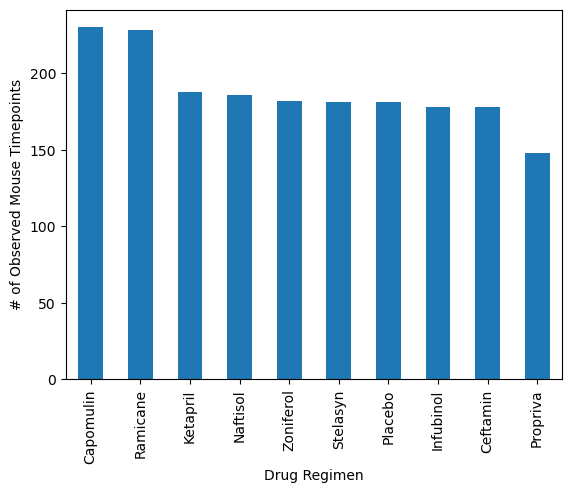

<Figure size 640x480 with 0 Axes>

In [29]:
bar_panda_plot = total_rows_per_drug.plot(kind = 'bar')
bar_panda_plot.set_xlabel("Drug Regimen")
bar_panda_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

Text(0, 0.5, '# Observed Mouse Timepoints')

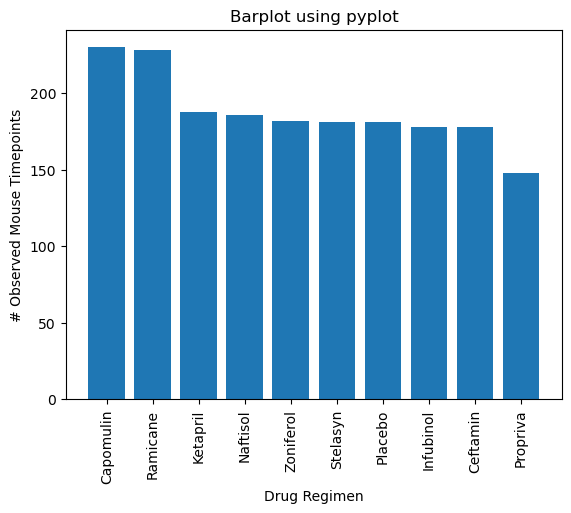

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drugs = total_rows_per_drug.index
x_axis = np.arange(len(total_rows_per_drug))

plt.bar(x_axis, total_rows_per_drug)
plt.xticks(x_axis, drugs, rotation = "vertical")
plt.title("Barplot using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")

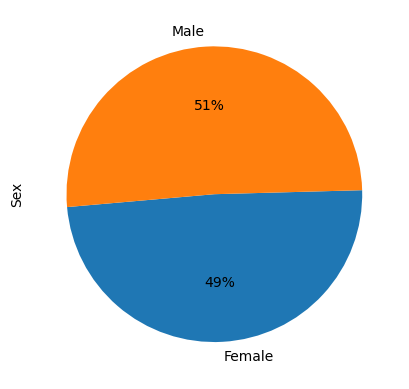

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes = data.groupby("Sex")["Sex"].count() 
pie_panda_plot = sexes.plot(kind = 'pie',autopct = '%1.0f%%', startangle = 185)


(-1.0999998294595792,
 1.099999925840278,
 -1.0999994453787694,
 1.0999999118116914)

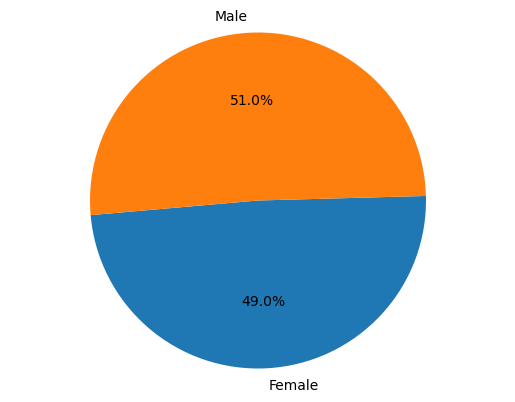

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexes, labels=sexes.index, startangle = 185, autopct="%1.1f%%")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = data.groupby("Mouse ID")["Timepoint"].max()
max_timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [37]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
end_data = pd.merge(data, max_timepoint, how="right", on=["Mouse ID", "Timepoint"])
end_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for value in treatments:
    tumor_vol.append(end_data.loc[end_data['Drug Regimen'] == value, :])
tumor_vol = pd.concat(tumor_vol)
    
    # Determine outliers using upper and lower bounds
capomulin = tumor_vol.loc[tumor_vol["Drug Regimen"] == "Capomulin",:]
ramicane = tumor_vol.loc[tumor_vol["Drug Regimen"] == "Ramicane",:]
infubinol = tumor_vol.loc[tumor_vol["Drug Regimen"] == "Infubinol",:]
ceftamin = tumor_vol.loc[tumor_vol["Drug Regimen"] == "Ceftamin",:]

capomulin_quartiles = capomulin["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])
ramicane_quartiles = ramicane["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])
infubinol_quartiles = infubinol["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])
ceftamin_quartiles = ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.50,0.75])

capomulin_iqr = capomulin_quartiles[0.75] - capomulin_quartiles[0.25]
ramicane_iqr = ramicane_quartiles[0.75] - ramicane_quartiles[0.25]
infubinol_iqr = infubinol_quartiles[0.75] - infubinol_quartiles[0.25]
ceftamin_iqr = ceftamin_quartiles[0.75] - ceftamin_quartiles[0.25]

capo_lower = capomulin_quartiles[0.25] - (1.5*capomulin_iqr)
ram_lower = ramicane_quartiles[0.25] - (1.5*ramicane_iqr)
infub_lower = infubinol_quartiles[0.25] - (1.5*infubinol_iqr)
ceft_lower = ceftamin_quartiles[0.25] - (1.5*ceftamin_iqr)

capo_upper = capomulin_quartiles[0.25] + (1.5*capomulin_iqr)
ram_upper = ramicane_quartiles[0.25] + (1.5*ramicane_iqr)
infub_upper = infubinol_quartiles[0.25] + (1.5*infubinol_iqr)
ceft_upper = ceftamin_quartiles[0.25] + (1.5*ceftamin_iqr)

capo_outlier = capomulin[(capomulin['Tumor Volume (mm3)'] > capo_upper) | (capomulin['Tumor Volume (mm3)'] < capo_lower)]
ram_outlier = ramicane[(ramicane['Tumor Volume (mm3)'] > ram_upper) | (ramicane['Tumor Volume (mm3)'] < ram_lower)]
infub_outlier = infubinol[(infubinol['Tumor Volume (mm3)'] > infub_upper) | (infubinol['Tumor Volume (mm3)'] < infub_lower)]
ceft_outlier = ceftamin[(ceftamin['Tumor Volume (mm3)'] > ceft_upper) | (ceftamin['Tumor Volume (mm3)'] < ceft_lower)]

#another method using .loc
# capo_outlier = capomulin.loc[(capomulin["Tumor Volume (mm3)"] < capo_lower) | (capomulin["Tumor Volume (mm3)"] > capo_upper)]

# ram_outlier = ramicane.loc[(ramicane["Tumor Volume (mm3)"] < ram_lower )|(
#                              ramicane["Tumor Volume (mm3)"] > ram_upper)]

# infub_outlier = infubinol.loc[(infubinol["Tumor Volume (mm3)"] < infub_lower )|(
#                              infubinol["Tumor Volume (mm3)"] > infub_upper)]

# ceft_outlier = ceftamin.loc[(ceftamin["Tumor Volume (mm3)"] < ceft_lower )|(
#                              ceftamin["Tumor Volume (mm3)"] > ceft_upper)]

print(f"Capomulin's potential outliers: {capo_outlier}")
print(f"Ramicane's potential outliers: {ram_outlier}")
print(f"Infubinol's potential outliers: {infub_outlier}")
print(f"Ceftamin's potential outliers: {ceft_outlier}")



Capomulin's potential outliers:     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
80      i557         45           47.685963                 1    Capomulin   
162     r157         15           46.539206                 0    Capomulin   

        Sex  Age_months  Weight (g)  
80   Female           1          24  
162    Male          22          25  
Ramicane's potential outliers:     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
157     q597         45           45.220869                 2     Ramicane   

      Sex  Age_months  Weight (g)  
157  Male          20          25  
Infubinol's potential outliers:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
27     c139         45           72.226731                 2    Infubinol   
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
27    Male          11          28  
31  Female          1

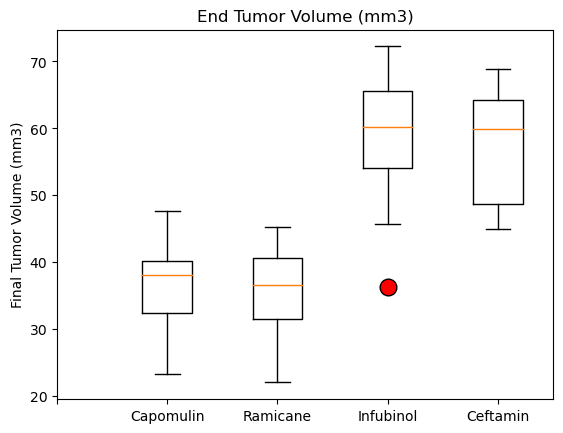

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
volumes = [capomulin["Tumor Volume (mm3)"],ramicane["Tumor Volume (mm3)"],infubinol["Tumor Volume (mm3)"],ceftamin["Tumor Volume (mm3)"]]
x_axis = np.arange(5)
fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Volume (mm3)')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volumes, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize' : 12})
plt.xticks(x_axis, ['','Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


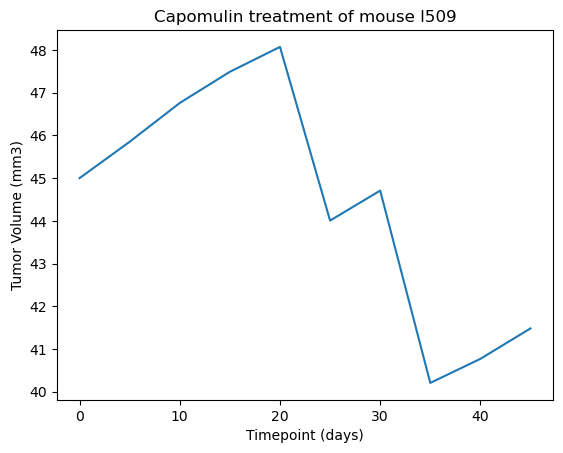

In [48]:
lone_mouse = data[data["Mouse ID"] == "l509"]
independent = lone_mouse["Timepoint"]
dependent = lone_mouse["Tumor Volume (mm3)"]

plot = plt.plot(independent, dependent)
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

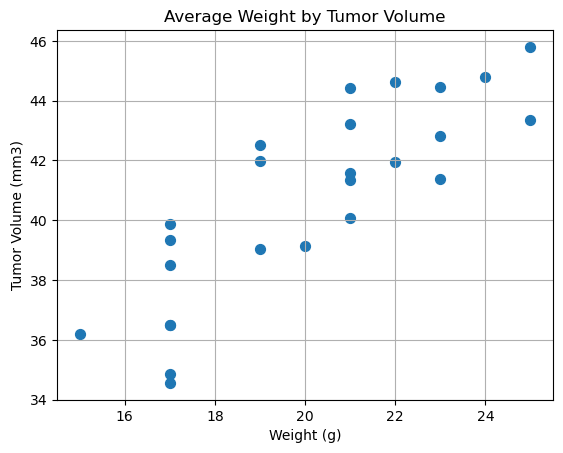

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#data.loc[data["Drug Regimen"] == "Capomulin"]
data[data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean().plot(kind = "scatter",
                                                                          y = "Tumor Volume (mm3)", x = "Weight (g)",
                                                                         title = "Average Weight by Tumor Volume",
                                                                         s = 50, grid = True, cmap = "coolwarm")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


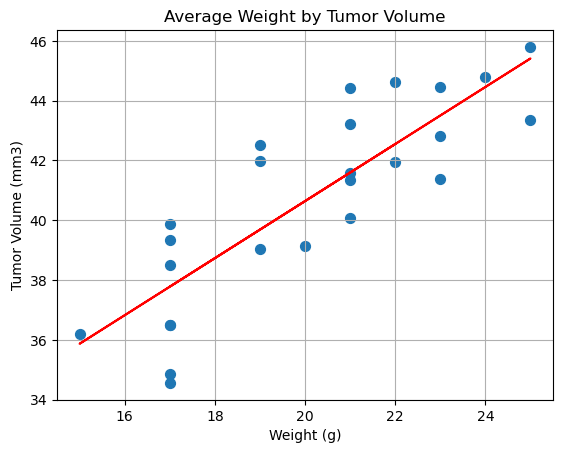

In [52]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
regression = data[data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(regression["Weight (g)"], regression["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
      
#set up equation for plotting      
weight = data.loc[data["Drug Regimen"] == "Capomulin", "Weight (g)"]
model = slope*weight + intercept

#recreate scatterplot
data[data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean().plot(kind = "scatter",
                                                                          y = "Tumor Volume (mm3)", x = "Weight (g)",
                                                                         title = "Average Weight by Tumor Volume",
                                                                         s = 50, grid = True, cmap = "coolwarm")
#add linear model
plt.plot(weight, model, "r")
plt.show()